<a href="https://colab.research.google.com/github/ggoddll99/ds_study/blob/main/240909_%EA%B3%BC%EC%A0%9C_%EB%AA%A8%EB%8D%B8%ED%9B%88%EB%A0%A8(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CHAPTER4. 모델 훈련**
**선형 회귀**
1. 직접 계산할 수 있는 공식을 사용하여 훈련 세트에 가장 잘 맞는 모델 파라미터(즉, 훈련 세트에 대해 비용 함수를 최소화하는 모델 파라미터)를 해석적으로 구한다.
2. 경사하강법(GD)라 불리는 반복적인 최적화 방식을 사용하여 모델 파라미터를 조금씩 바꾸면서 비용 함수를 훈련 세트에 대해 최소화시킨다. 경사 하강법의 변종인 배치(batch) 경사 하강법, 미니배치(mini-batch) 경사 하강법, 확률적(stochastic) 경사 하강법(SGD)도 살펴본다.

**다항 회귀** : 비선형 데이터셋에 훈련시킬 수 있는 모델. 선형 회귀보다 파라미터가 많아서 훈련 데이터에 과적합되기 쉽다.
1. 학습 곡선(learning curve)을 사용해 모델이 과적합되는지 감지하는 방법을 살펴보자.
2. 훈련 세트의 과적합을 감소시킬 수 있는 규제 기법을 알아보자.

**로지스틱 회귀, 소프트맥스 회귀**

## **4.1 선형 회귀**

$$삶의 만족도 = \theta_0 + \theta_1 \times 1인당GDP$$
이 모델은 입력 특성인 1인당_GDP에 대한 선형 함수이다. $\theta_0$와 $\theta_1$이 모델 파라미터이다.

더 일반적으로 선형 모델은 [식 4-1]에서처럼 입력 특성의 가중치 합과 편향(bias)(또는 절편(intercept))이라는 상수를 더해 예측을 만든다.

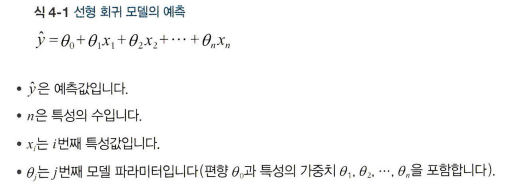

이 식은 [식 4-2]처럼 벡터 형태로 더 간단하게 쓸 수 있다.

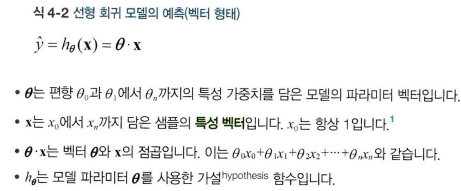

머신러닝에서는 종종 벡터를 하나의 열을 가진 2D 배열인 열 벡터(column vector)로 나타낸다. $\theta$와 x가 열 벡터라면 예측은 $\hat{y}=\theta'x$이다. 여기에서 $\theta'$는 $\theta$의 전치(transpose)이다(열 벡터가 아니라 행 벡터가 된다).

모델을 훈련시킨다는 것은 모델이 훈련 세트에 가장 잘 맞도록 모델 파라미터를 설정하는 것이다. 이를 위해 먼저 모델이 훈련 데이터에 얼마나 잘 들어맞는지 측정해야 한다. 회귀에서 가장 많이 사용되는 성능 측정 지표는 평균 제곱근 오차(RMSE)이다. 그러므로 선형 회귀 모델을 훈련시키려면 RMSE를 최소화하는 $\theta$를 찾아야 한다. 실제로는 RMSE보다 평균 제곱 오차(MSE)를 최소화하는 것이 같은 결과를 내면서(어떤 함수를 최소화하는 것은 그 함수의 제곱근을 최소화하는 것과 같으므로) 더 간단하다.

훈련 세트 x에 대한 선형 회귀 가설 $h_{\theta}$의 MSE는 [식 4-3]처럼 계산한다. 편의상 벡터 표현으로 모델 파라미터와 특성을 모두 표현하기 위해 편향 $\theta_{0}$에 가상의 특성 $x_{0}=1$이 곱해졌다고 생각한다. 최종 모델을 평가하는 데 사용하는 성능 측정 지표 말고 학습 알고리즘이 다른 함수를 최적화하는 경우가 종종 있다. 일반적으로 성능 측정 지표에는 없는 유용한 미분 특성이 있어서 이런 함수가 계산하기 더 쉽거나, 훈련하는 동안 모델에 제약을 가하기 위해 사용한다.

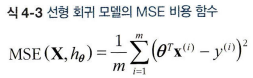

### **4.1.1 정규방정식**

비용 함수를 최소화하는 $\theta$ 값을 찾기 위한 해석적인 방법이 있다. 이를 정규방정식이라고 한다.

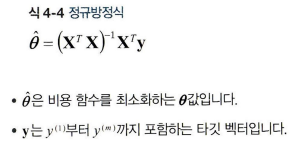

이 공식을 테스트하기 위해 선형처럼 보이는 데이터를 생성한다.

In [ ]:
import numpy as np
X=2*np.random.rand(100, 1)
y=4+3*X+np.random.randn(100, 1)

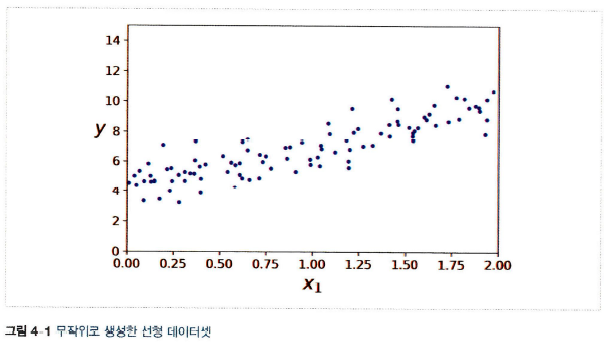

정규방정식을 사용해 $\hat{\theta}$을 계산해보자. 넘파이 선형대수 모듈(`np.linalg`)에 있는 `inv()` 함수를 사용해 역행렬을 계산하고 `dot()` 메서드를 사용해 행렬 곱셈을 한다.

In [ ]:
X_b=np.c_[np.ones((100, 1)), X]
theta_best=np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

이 데이터를 생성하기 위해 사용한 함수는 $y=4+3x_{1}+가우시안잡음$이다. 정규방정식으로 계산한 값을 확인해보자.

In [ ]:
theta_best

array([[3.97503556],
       [3.06599129]])

$\theta_0=4.215$와 $\theta_1=2.770$ 대신 $\theta_0=4$와 $\theta_1=3$을 기대했으나, 잡음 때문에 원래 함수의 파라미터를 정확히 재현하지 못했다.

$\hat{\theta}$을 사용해 예측 해보자.

In [ ]:
X_new=np.array([[0], [2]])
X_new_b=np.c_[np.ones((2, 1)), X_new]
y_predict=X_new_b.dot(theta_best)
y_predict

array([[ 3.97503556],
       [10.10701813]])

모델의 예측을 그래프에 나타내보자(그림 4-2).

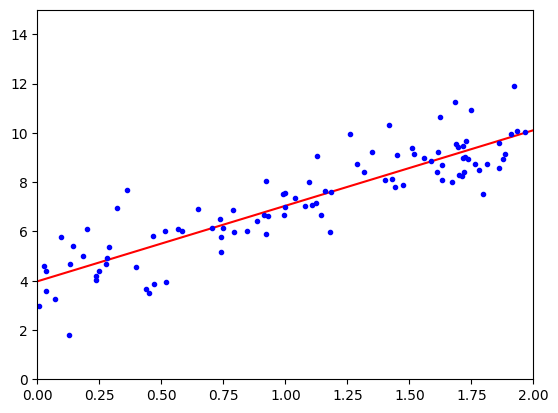

In [ ]:
import matplotlib.pyplot as plt

plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])
plt.show()

**선형 회귀**

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg=LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

사이킷런은 특성의 가중치(`coef_`)와 편향(`intercept_`)을 분리하여 저장한다.

In [ ]:
lin_reg.intercept_, lin_reg.coef_

(array([3.97503556]), array([[3.06599129]]))

In [ ]:
lin_reg.predict(X_new)

array([[ 3.97503556],
       [10.10701813]])

`LinearRegression` 클래스는 `scipy.linalg.lstsq()` 함수('최소 제곱'에서 이름을 따옴)를 기반으로 한다. 이 함수를 직접 호출할 수도 있다.

In [ ]:
theta_best_svd, residuals, rank, s=np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.97503556],
       [3.06599129]])

이 함수는 $\hat{\theta}-X^{+}y$를 계산한다. 여기에서 $X^{+}$는 X의 유사역행렬이다 (정확하게는 무어-펜로즈 역행렬이다). `np.linalg.pinv()` 함수를 사용해 유사역행렬을 직접 구할 수 있다.

In [ ]:
np.linalg.pinv(X_b).dot(y)

array([[3.97503556],
       [3.06599129]])

유사역행렬 자체는 특잇값 분해(SVD)라 부르는 표준 행렬 분해 기법을 사용해 계산된다. SVD는 훈련 세트 행렬 X를 3개의 행렬 곱셈 $U\Sigma^{+}V'$로 분해한다(`numpy.linalg.svd()` 참고). 유사역행렬은 $X^{+}=U\Sigma^{+}V'$로 계산된다. $\Sigma^{+}$를 계산하기 위해 알고리즘이 $\Sigma$를 먼저 구하고 그다음 어떤 낮은 임곗값보다 작은 모든 수를 0으로 바꾼다. 그다음 0이 아닌 모든 값을 역수로 치환한다. 마지막으로 만들어진 행렬을 전치한다. 정규방정식을 계산하는 것보다 이 방식이 훨씬 효율적이다. 또한 극단적인 경우도 처리할 수 있다. 실제로 m<n이거나 어떤 특성이 중복되어 행렬 $X^{T}X$의 역행렬이 없다면(즉, 특이 행렬이라면) 정규방정식이 작동하지 않는다. 하지만 유사역행렬은 항상 구할 수 있다.

### **4.1.2 계산 복잡도**
정규방정식은 $(n+1)\times(n+1)$ 크기가 되는 $X^{T}X$의 역행렬을 계산한다(n은 특성 수). 역행렬을 계산하는 계산 복잡도는 일반적으로 $O(n^{2.4})$에서 $O(n^3)$ 사이다(구현 방법에 따라 차이가 있다). 다시 말해 특성 수가 두 배로 늘어나면 계산 시간이 대략 $2^{2.4}=5.3$에서 $2^3=8$배로 증가한다.

사이킷런의 `LinearRegression` 클래스가 사용하는 SVD 방법은 약 $O(n^2)$이다. 특성의 개수가 두 배로 늘어나면 계산 시간이 대략 4배가 된다.

정규방정식과 SVD 방법 모두 특성 수가 많아지면 (예를 들어 100,000) 매우 느려진다. 다행인 것은 훈련 세트의 샘플 수에 대해서는 선형적으로 증가한다(둘 다 $O(m)$이다). 따라서 메모리 공간이 허락된다면 큰 훈련 세트도 효율적으로 처리할 수 있다.

또한 (정규방정식이나 다른 알고리즘으로) 학습된 선형 회귀 모델은 예측이 매우 빠르다. 예측 계산 복잡도는 샘플 수와 특성 수에 선형적이다. 다시 말해 예측하려는 샘플이 두 배로 늘어나면 (또는 특성이 두 배로 늘어나면) 걸리는 시간도 거의 두 배로 증가한다.

이제 아주 다른 방법으로 선형 회귀 모델을 훈련시켜보자. 이 방법은 특성이 매우 많고 훈련 샘플이 너무 많아 메모리에 모두 담을 수 없을 때 적합하다.

## **4.2 경사 하강법**
경사 하강법(GD)은 여러 종류의 문제에서 최적의 해법을 찾을 수 있는 일반적인 최적화 알고리즘이다. 경사 하강법의 기본 아이디어는 비용 함수를 최소화하기 위해 반복해서 파라미터를 조정해가는 것이다.

짙은 안개 때문에 산속에서 길을 잃었다고 생각해보자. 발 밑 지면의 기울기만 느낄 수 있다. 빨리 골짜기로 내려가는 좋은 방법은 가장 가파른 길을 따라 아래로 내려가는 것이다. 이것이 바로 경사 하강법의 기본 원리이다. 파라미터 벡터 $\theta$에 대해 비용 함수의 현재 그레디언트를 계산한다. 그리고 그레디언트가 감소하는 방향으로 진행한다. 그레디언트가 0이 되면 최솟값에 도달한 것이다.

구체적으로 보면 $\theta$를 임의의 값으로 시작해서 (무작위 초기화) 한 번에 조금씩 비용 함수가 감소되는 방향으로 진행하여 알고리즘이 최솟값에 수렴할 때까지 점진적으로 향상시킨다(그림 4-3).

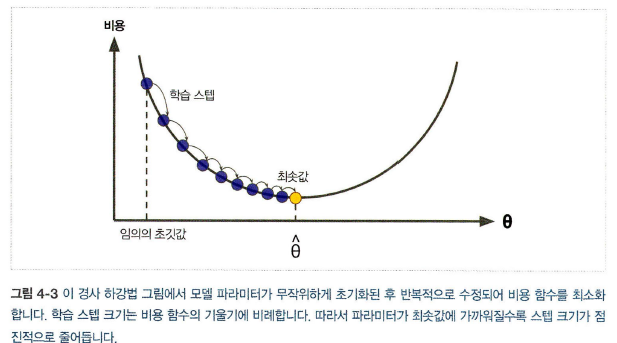

경사 하강법에서 중요한 파라미터는 스텝의 크기로, 학습률(learning rate) 하이퍼파라미터로 결정된다. 학습률이 너무 작으면 알고리즘이 수렴하기 위해 반복을 많이 진행해야 하므로 시간이 오래 걸린다(그림 4-4).

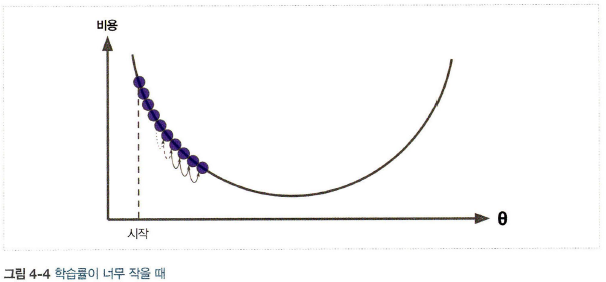

한편 학습률이 너무 크면 골짜기를 가로질러 반대편으로 건너뛰게 되어 이전보다 더 높은 곳으로 올라가게 될지도 모른다. 이는 알고리즘을 더 큰 값으로 발산하게 만들어 적절한 해법을 찾지 못하게 된다(그림 4-5).

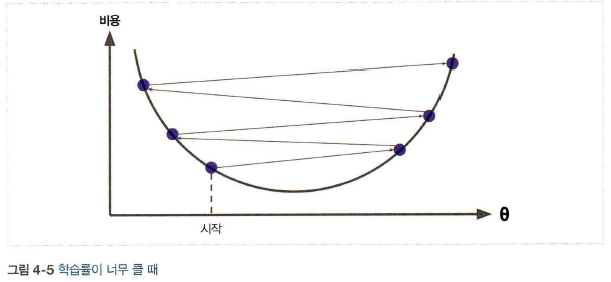

모든 비용 함수가 매끈한 그릇과 같지는 않다. 패인 곳, 산마루, 평지 등 특이한 지형이 있으면 최솟값으로 수렴하기 매우 어렵다. [그림 4-6]은 경사 하강법의 두가지 문제점을 보여준다. 무작위 초기화 때문에 알고리즘이 왼쪽에서 시작하면 전역 최솟값보다 덜 좋은 지역 최솟값에 수렴한다. 알고리즘이 오른쪽에서 시작하면 평탄한 지역을 지나기 위해 시간이 오래 걸리고 일찍 멈추게 되어 전역 최솟값에 도달하지 못한다.

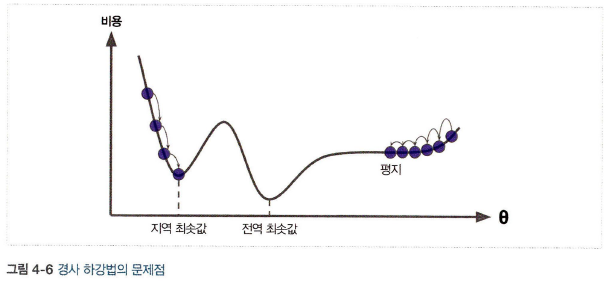

다행히 선형 회귀를 위한 MSE 비용 함수는 곡선에서 어떤 두 점을 선택해 선을 그어도 곡선을 가로지르지 않는 볼록 함수이다. 이는 지역 최솟값이 없고 하나의 전역 최솟값만 있다는 뜻이다. 또한 연속된 함수이고 기울기가 갑자기 변하지 않는다. 이 두 사실로부터 경사 하강법이 전역 최솟값에 가깝게 접근할 수 있다는 것을 보장한다(학습률이 너무 높지 않고 충분한 시간이 주어지면).

사실 비용 함수는 그릇 모양을 하고 있지만 특성들의 스케일이 매우 다르면 길쭉한 모양일 수 있다. [그림 4-7]은 특성 1과 특성 2의 스케일이 같은 훈련 세트(왼쪽)와 특성 1이 특성 2보다 더 작은 훈련 세트(오른쪽)에 대한 경사 하강법을 보여준다.

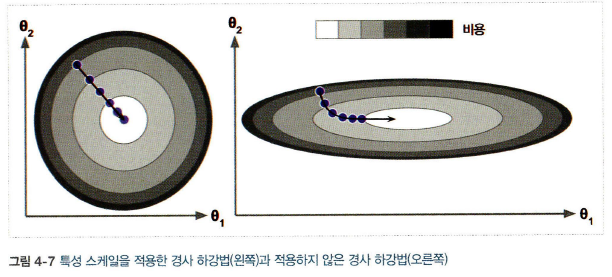

그림에서 볼 수 있듯이 왼쪽의 경사 하강법 알고리즘이 최솟값으로 곧장 진행하고 있어 빠르게 도달한다. 반면에 오른쪽 그래프는 처음엔 전역 최솟값의 방향에 거의 직각으로 향하다가 평편한 골짜기를 길게 돌아서 나간다. 결국 최솟값에 도달하겠지만 시간이 오래 걸릴 것이다.

경사 하강법을 사용할 때는 반드시 모든 특성이 같은 스케일을 갖도록 만들어야 한다(예를 들면 사이킷런의 `StandardScaler`를 사용하여). 그렇지 않으면 수렴하는 데 훨씬 오래 걸린다.

앞의 그림은 모델 훈련이 (훈련 세트에서) 비용 함수를 최소화하는 모델 파라미터의 조합을 찾는 일임을 설명해준다. 이를 모델의 파라미터 공간에서 찾는다고 말한다. 모델이 가진 파라미터가 많을수록 이 공간의 차원은 커지고 검색이 더 어려워진다. 300차원의 건초더미에서 바늘을 찾는 것은 차원이 3개뿐일 때보다 훨씬 어렵다. 다행히 선형 회귀의 경우 비용 함수가 볼록 함수이기 때문에 이 바늘은 그릇의 맨 아래에 있을 것이다.

### **4.2.1 배치 경사 하강법**
경사 하강법을 구현하려면 각 모델 파라미터 $\theta_j$에 대해 비용 함수의 그레디언트를 계산해야 한다. 다시 말해 $\theta_j$가 조금 변경될 때 비용 함수가 얼마나 바뀌는지 계산해야 한다. 이를 편도함수라고 한다. 이는 '동쪽을 바라봤을 때 발 밑에 느껴지는 산의 기울기는 얼마인가?'와 같은 질문이다. 그리고 같은 질문을 북쪽에 대해서도 한다(3차원 이상의 세상이라 가정하면 다른 모든 차원에 대해서도 반복한다). [식 4-5]는 파라미터 $\theta_j$에 대한 비용 함수의 편도함수 $\frac{\sigma}{\sigma\theta_j}MSE(\theta)$이다.

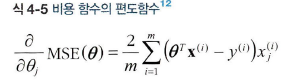

편도함수를 각각 계산하는 대신 [식 4-6]을 사용하여 한꺼번에 계산할 수 있다. 그레디언트 벡터 $\nabla_{\theta}MSE(\theta)$는 비용 함수의 (모델 파라미터마다 한 개씩인) 편도 함수를 모두 담고 있다.

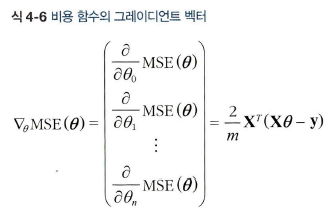

이 공식은 매 경사 하강법 스텝에서 전체 훈련 세트 X에 대해 계산한다. 그래서 이 알고리즘을 배치 경사 하강법이라고 한다. 즉, 매 스텝에서 훈련 데이터 전체를 사용한다. 이런 이유로 매우 큰 훈련 세트에서는 아주 느리다. 그러나 경사 하강법은 특성 수에 민감하지 않다. 수십만 개의 특성에서 선형 회귀를 훈련시키려면 정규방정식이나 SVD 분해보다 경사 하강법을 사용하는 편이 훨씬 빠르다.

위로 향하는 그레디언트 벡터가 구해지면 반대 방향인 아래로 가야 한다. $\theta$에서 $\nabla_{\theta}MSE(\theta)$는 비용 함수의 (모델 파라미터마다 한 개씩인) 편도함수를 모두 담고 있다.

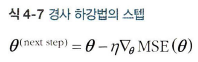

이 알고리즘을 간단히 구현해보자.

In [ ]:
eta=0.1 # 학습률
n_iterations=1000
m=100

theta=np.random.randn(2, 1)

for iteration in range(n_iterations):
    gradients=2/m*X_b.T.dot(X_b.dot(theta)-y)
    theta=theta-eta*gradients

계산된 theta를 확인해보자.

In [ ]:
theta

array([[3.97503556],
       [3.06599129]])

정규방정식으로 찾은 것과 정확히 같다. 경사 하강법이 완벽하게 작동했다. 학습률 $\eta$를 바꿔보자. [그림 4-8]은 세 가지 다른 학습률을 사용하여 진행한 경사 하강법의 스텝 처음 10개를 보여준다 (점선은 시작점을 나타낸다).

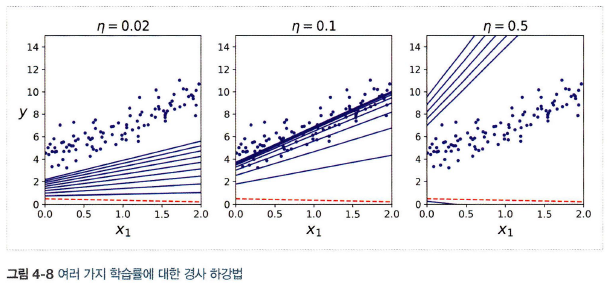

왼쪽 학습률이 너무 낮다. 알고리즘은 최적점에 도달하겠지만 시간이 오래 걸릴 것이다. 가운데는 학습률이 아주 적당해보인다. 반복 몇 번만에 이미 최적점에 수렴했다. 오른쪽은 학습률이 너무 높다. 알고리즘이 이리저리 널뛰면서 스텝마다 최적점에서 점점 더 멀어져 발산한다.

적절한 학습률을 찾으려면 그리드 탐색을 사용한다. 하지만 그리드 탐색에서 수렴하는 데 너무 오래 걸리는 모델을 막기 위해 반복 횟수를 제한해야 한다.

반복 횟수가 너무 작으면 최적점에 도달하기 전에 알고리즘이 멈춘다. 너무 크면 모델 파라미터가 더는 변하지 않는 동안 시간을 낭비하게 된다. 간단한 해결책은 반복 횟수를 아주 크게 지정하고 그레디언트 벡터가 아주 작아지면, 즉 벡터의 노름이 어떤 값 $\epsilon$ (허용오차) 보다 작아지면 경사 하강법이 최솟값에 도달한 것이므로 알고리즘을 중지하는 것이다.

비용 함수가 볼록 함수이고 기울기가 급격하게 바뀌지 않는 경우, 학습률을 고정한 배치 경사 하강법은 어느 정도 시간이 걸리겠지만 결국 최적의 솔루션에 수렴할 것이다. 비용 함수의 모양에 따라 달라지겠지만 $\epsilon$ 범위 안에서 최적의 솔루션에 도달하기 위해서는 $O(1/\epsilon)$의 반복이 걸릴 수 있다. 다시 말해 허용 오차 $\epsilon$을 1/10으로 줄이면 알고리즘의 반복은 10배 늘어날 것이다.

### **4.2.2 확률적 경사 하강법**
배치 경사 하강법의 가장 큰 문제는 매 스텝에서 전체 훈련 세트를 사용해 그레디언트를 계산한다는 사실이다. 훈련 세트가 커지면 매우 느려진다. 이와는 정반대로 확률적 경사 하강법은 매 스텝에서 한 개의 샘플을 무작위로 선택하고 그 하나의 샘플에 대한 그레디언트를 계산한다. 매 반복에서 다뤄야 할 데이터가 매우 적기 때문에 한 번에 하나의 샘플을 처리하면 알고리즘이 확실히 훨씬 빠르다. 또한 매 반복에서 하나의 샘플만 메모리에 있으면 되므로 매우 큰 훈련 세트도 훈련시킬 수 있다(SGD는 외부 메모리 학습 알고리즘으로 구현할 수 있다).

반면에 확률적이기 때문에 이 알고리즘은 배치 경사 하강법보다 훨씬 불안정하다. 비용 함수가 최솟값에 다다를 때까지 부드럽게 감소하기 않고 위아래로 요동치면서 평균적으로 감소한다. 시간이 지나면 최솟값에 매우 근접하겠지만 요동이 지속되면서 최솟값에 안착하지 못할 것이다(그림 4-9). 알고리즘이 멈출 때 좋은 파라미터가 구해지겠지만 최적치는 아니다.

[그림 4-6]처럼 비용 함수가 매우 불규칙할 경우 알고리즘이 지역 최솟값을 건너뛸 수 있도록 도와주므로 확률적 경사 하강법이 배치 경사 하강법보다 전역 최솟값을 찾을 가능성이 높다.

무작위성은 지역 최솟값에서 탈출시켜줘서 좋지만 알고리즘을 전역 최솟값에 다다르지 못하게 한다는 점에서는 좋지 않다. 이 딜레마를 해결하는 한 가지 방법은 학습률을 점진적으로 감소시키는 것이다. 시작할 때는 학습률을 크게 하고 (수렴을 빠르게 하고 지역 최솟값에 빠지지 않게 한다). 점차 작게 줄여서 알고리즘이 전역 최솟값에 도달하게 된다. 이 과정은 금속공학 분야에서 가열한 금속을 천천히 냉각시키는 어닐링(풀림) 과정에서 영감을 얻은 담금질 기법 알고리즘과 유사하다. 매 반복에서 학습률을 결정하는 함수를 학습 스케쥴이라고 부른다. 학습률이 너무 빨리 줄어들면 지역 최솟값에 갇히거나 최솟값까지 가는 중간에 멈춰버릴 수도 있다. 학습률이 너무 천천히 줄어들면 오랫동안 최솟값 주변을 맴돌거나 훈련을 너무 일찍 중지해서 지역 최솟값에 머무를 수 있다.

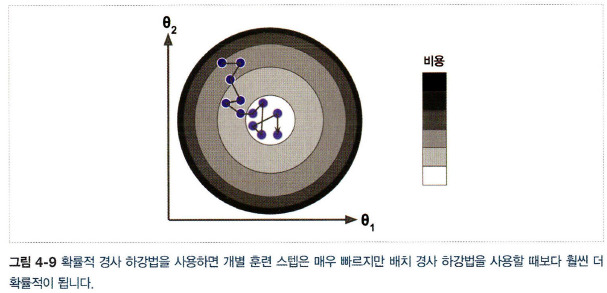

다음 코드는 간단한 학습 스케쥴을 사용한 확률적 경사 하강법의 구현이다.

In [ ]:
n_epochs=50
t0, t1=5, 50 # 학습 스케쥴 하이퍼파라미터

def learning_schedule(t):
    return t0/(t+t1)

theta=np.random.randn(2, 1) # 무작위 초기화

for epoch in range(n_epochs):
    for i in range(m):
        random_index=np.random.randint(m)
        xi=X_b[random_index:random_index+1]
        yi=y[random_index:random_index+1]
        gradients=2*xi.T.dot(xi.dot(theta)-yi)
        eta=learning_schedule(epoch*m+i)
        theta=theta-eta*gradients

일반적으로 한 반복에서 m번 되풀이되고, 이때 각 반복을 에포크라고 한다. 배치 경사 하강법 코드가 전체 훈련 세트에 대해 1,000번 반복하는 동안 이 코드는 훈련 세트에서 50번만 반복하고도 매우 좋은 값에 도달했다.

In [ ]:
theta

array([[3.94430837],
       [3.08980426]])

[그림 4-10]은 훈련 스텝의 첫 20개를 보여준다(스텝이 불규칙하게 진행한다).

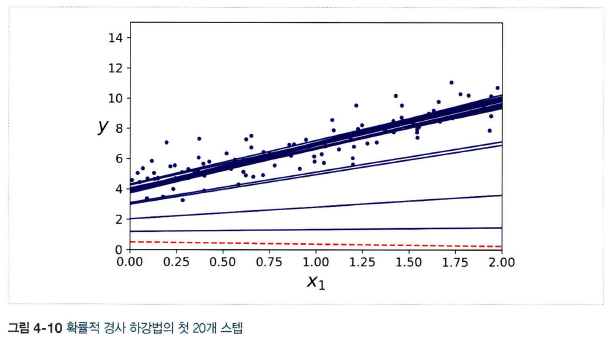

샘플을 무작위로 선택하기 때문에 어떤 샘플은 한 에포크에서 여러 번 선택될 수 있고 어떤 샘플은 전혀 선택되지 못할 수도 있다. 알고리즘이 에포크마다 모든 샘플을 사용하게 하려면 훈련 세트를 섞은 후 (입력 특성과 레이블을 동일하게 섞어야 한다) 차례대로 하나씩 선택하고 다음 에포크에서 다시 섞는 식의 방법을 사용할 수 있다. 그러나 이렇게 하면 보통 더 늦게 수렴된다.

사이킷런에서 SGD 방식으로 선형 회귀를 사용하려면 기본값으로 제곱 오차 비용 함수를 최적화하는 `SGDRegressor` 클래스를 사용한다. 다음 코드는 최대 1,000번 에포크 동안 실행된다(`max_iter=1000`). 또는 한 에포크에서 0.001보다 적게 손실이 줄어들 때까지 실행된다(`tol=le-3`). 학습률 0.1(`eta0=0.1`)로 기본 학습 스케쥴을 사용한다. 규제는 전혀 사용하지 않았다(`penalty=None`).

In [ ]:
from sklearn.linear_model import SGDRegressor

sgd_reg=SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

여기에서도 정규방정식으로 구한 것과 매우 비슷한 값을 얻었다.

In [ ]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.96342157]), array([3.06725743]))

### **4.2.3 미니배치 경사 하강법**
배치와 확률적 경사 하강법을 알고 있다면 이해하기 매우 쉽다. 각 스텝에서 전체 훈련 세트(배치 경사 하강법에서처럼)나 하나의 샘플(확률적 경사 하강법에서처럼)을 기반으로 그레디언트를 계산하는 것이 아니라 미니배치라 부르는 임의의 작은 샘플 세트에 대해 그레디언트를 계산한다. 확률적 경사 하강법에 비해 미니배치 경사 하강법의 주요 장점은 행렬 연산에 최적화된 하드웨어, 특히 GPU를 사용해서 얻는 성능 향상이다.

특히 미니배치를 어느 정도 크게 하면 이 알고리즘은 파라미터 공간에서 SGD보다 덜 불규칙하게 움직인다. 결국 미니배치 경사 하강법이 SGD보다 최솟값에 더 가까이 도달하게 될 것이다. 하지만 지역 최솟값에서 빠져나오기는 더 힘들지도 모른다(선형 회귀와 같지 않고 지역 최솟값이 문제가 되는 경우). [그림 4-11]은 세 가지 경사 하강법 알고리즘이 훈련 과정동안 파라미터 공간에서 움직인 경로이다. 모두 최솟값 근처에 도달했지만 배치 경사 하강법의 경로가 실제로 최솟값에서 멈춘 반면 확률적 경사 하강법과 미니배치 경사 하강법은 근처에서 맴돌고 있다. 그렇지만 배치 경사 하강법에는 매 스텝에서 많은 시간이 소요되고, 확률적 경사 하강법과 미니배치 경사 하강법도 적절한 학습 스케쥴을 사용하면 최솟값에 도달한다는 것을 잊지 말아야 한다.

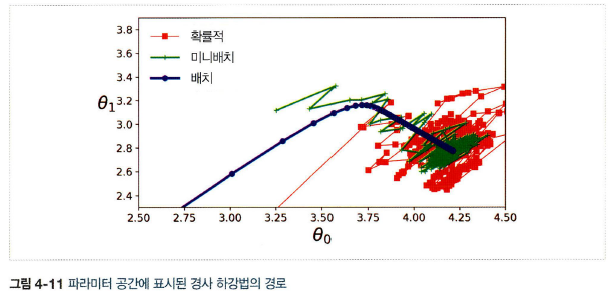

지금까지 논의한 알고리즘을 선형 회귀를 사용해 비교해보자(m은 훈련 샘플 수이고 n은 특성 수이다). [표 4-1] 참조.

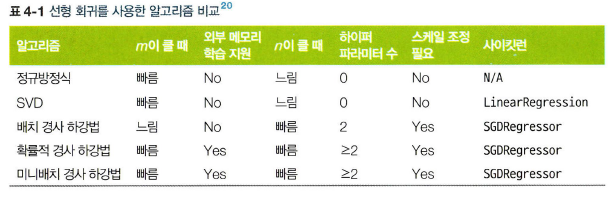

이 알고리즘들은 훈련 결과에 거의 차이가 없다. 모두 매우 비슷한 모델을 만들고 정확히 같은 방식으로 예측한다.